In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

#print(X)
#print(y)

In [2]:
len(X)

100

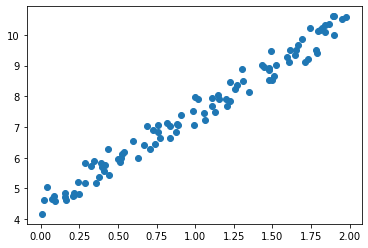

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         1.22420308]
 [1.         0.75769067]
 [1.         0.34332095]
 [1.         1.25702359]
 [1.         1.89595817]
 [1.         1.05531574]
 [1.         0.32639014]
 [1.         1.12776152]
 [1.         1.83851342]
 [1.         1.22269662]
 [1.         0.00772955]
 [1.         0.83845405]
 [1.         1.200393  ]
 [1.         0.59855062]
 [1.         0.75662095]
 [1.         1.26887287]
 [1.         0.98883143]
 [1.         0.72676109]
 [1.         0.21724755]
 [1.         1.5942322 ]
 [1.         0.70595767]
 [1.         0.4333663 ]
 [1.         0.62672083]
 [1.         0.5142842 ]
 [1.         1.86897977]
 [1.         0.37609772]
 [1.         1.61700436]
 [1.         1.2032375 ]
 [1.         1.43194806]
 [1.         1.79565966]
 [1.         0.2112215 ]
 [1.         0.66896291]
 [1.         1.89174141]
 [1.         1.15073139]
 [1.         1.06644066]
 [1.         0.08944721]
 [1.         1.49561672]
 [1.         0.2469742 ]
 [1.         1.66280315]
 [1.         0.98950822]


In [5]:
theta_best

array([[4.39746912],
       [3.07554641]])

In [6]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [7]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.39746912],
       [10.54856194]])

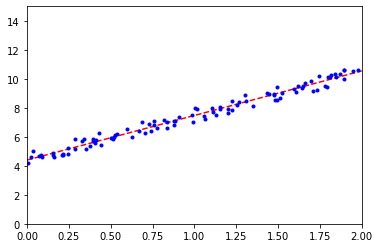

In [9]:
#plt.clear()
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.39746912],
       [10.54856194]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.39746912],
       [3.07554641]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.39746912],
       [3.07554641]])

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
print(theta)

[[4.39746912]
 [3.07554641]]


[[2.25652214]
 [4.03546214]]
[[2.24738085]
 [4.01961554]]
[[2.47528774]
 [4.18050816]]
[[2.52398334]
 [4.26147934]]
[[2.38932474]
 [4.02040935]]
[[2.77620257]
 [4.02947254]]
[[3.01960397]
 [4.03135393]]
[[3.18770125]
 [4.05844747]]
[[3.29846244]
 [4.08580262]]
[[3.20871319]
 [3.92352235]]
[[3.17792723]
 [3.87272664]]
[[3.17462562]
 [3.86679806]]
[[3.17955404]
 [3.87576045]]
[[3.13219377]
 [3.79952307]]
[[3.24033186]
 [3.83794674]]
[[3.25281726]
 [3.8616268 ]]
[[3.32233909]
 [3.93037218]]
[[3.4121519 ]
 [3.94934257]]
[[3.46289579]
 [3.98328835]]
[[3.60012578]
 [3.99477793]]
[[3.54852167]
 [3.9403193 ]]
[[3.49986208]
 [3.8578584 ]]
[[3.46984263]
 [3.80092287]]
[[3.54424231]
 [3.81708739]]
[[3.5336598 ]
 [3.80535122]]
[[3.59720399]
 [3.8574137 ]]
[[3.66482317]
 [3.86802805]]
[[3.71831327]
 [3.90690257]]
[[3.76333329]
 [3.93056117]]
[[3.59276048]
 [3.63909479]]
[[3.55143453]
 [3.57257104]]
[[3.62247663]
 [3.62632299]]
[[3.59419489]
 [3.59442792]]
[[3.58836463]
 [3.58553265]]
[[3.57057329]


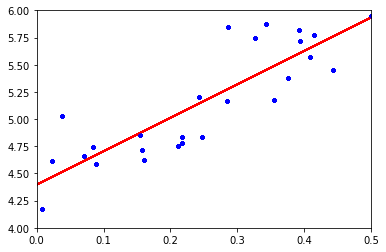

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2,1)

X_gradient = np.c_[np.ones((2, 1)), X_new]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch * m + i)

        theta = theta - eta * gradients

        y_gradient = X_gradient.dot(theta_best)
        
        print(theta)

    plt.plot(X_gradient, y_gradient, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 0.5, 4, 6])

plt.show()

In [16]:
print(theta)

[[4.39778685]
 [3.07066581]]


In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.37354549]), array([3.07482367]))

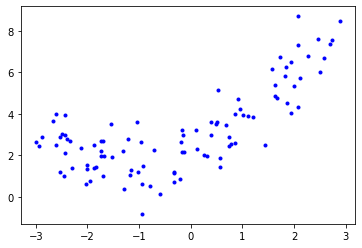

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m , 1) 

plt.plot(X, y, 'b.')
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.32660408]
[-0.32660408  0.10667023]


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.22177764]), array([[0.97064395, 0.41766148]]))

In [22]:
X_plot = np.array([[-3], [3]])
X_plot_poly = poly_features.fit_transform(X_plot)

print(X_plot[0])
print(X_plot_poly)

y_poly_predict = lin_reg.predict(X_poly)
#print(y_poly_predict)

[-3]
[[-3.  9.]
 [ 3.  9.]]


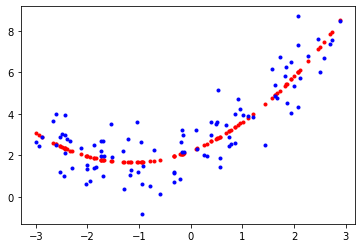

In [23]:
plt.plot(X, y_poly_predict, 'r.')
plt.plot(X, y, 'b.')

plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
def Plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

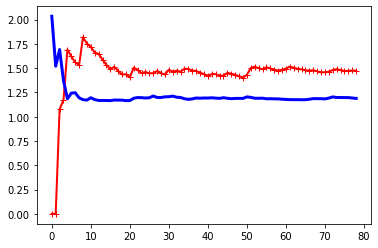

In [26]:
lin_reg = LinearRegression()
Plot_learning_curve(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

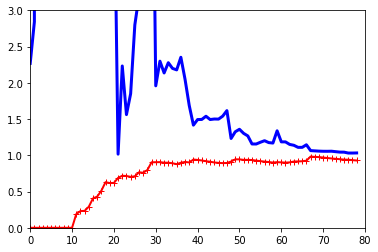

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

Plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.65394921]])

In [29]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.64523712])

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([4.59706865])

In [31]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.61928206])

In [32]:
from sklearn.linear_model import ElasticNet

elastic_req = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_req.fit(X, y)

elastic_req.predict([[1.5]])

array([4.60285606])

In [33]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=10000, tol=np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [34]:
print(minimum_val_error, best_epoch)
print(best_model)

best_model.fit(X, y.ravel())
best_model.predict([[1.5]])

0.9627159560541945 63
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=10000,
             penalty=None, tol=inf, warm_start=True)


array([1.35549629])

In [37]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
print(list(iris.keys()))

X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

print(X)
print(y)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 

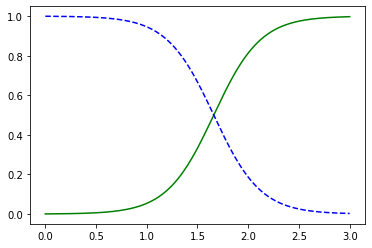

In [40]:
log_reg = LogisticRegression()

log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
plt.show()

In [44]:
log_reg.predict([[1.7], [1.5], [1.69]])

array([1, 0, 1])

In [45]:
X = iris['data'][:, (2,3)]
y = iris['target']

soft_max = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
soft_max.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [46]:
print(soft_max.predict([[5,2]]))
print(soft_max.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
